| **Inicio** | **Siguiente 2** |
|----------- |---------------|
| [🏠](../../README.md) | [⏩](./2.TRATAMIENTO_DE_OUTLIERS.ipynb)|

# **1. IMPUTACIÓN DE DATOS**

## **Métodos de Imputación de datos**

Los métodos de imputación de datos son técnicas utilizadas para estimar o reemplazar valores faltantes en conjuntos de datos. Los valores faltantes pueden ser el resultado de errores de medición, fallos en la recolección de datos o simplemente la falta de disponibilidad de ciertos valores. Estos métodos permiten completar los datos faltantes de manera que se puedan realizar análisis o modelos estadísticos más completos y precisos.

A continuación, te explicaré algunos de los métodos de imputación más comunes junto con ejemplos de código Python y gráficas utilizando la biblioteca matplotlib.

* **Imputación por valor medio:**

Este método consiste en reemplazar los valores faltantes por el valor promedio de la variable correspondiente. Es adecuado para variables numéricas continuas.

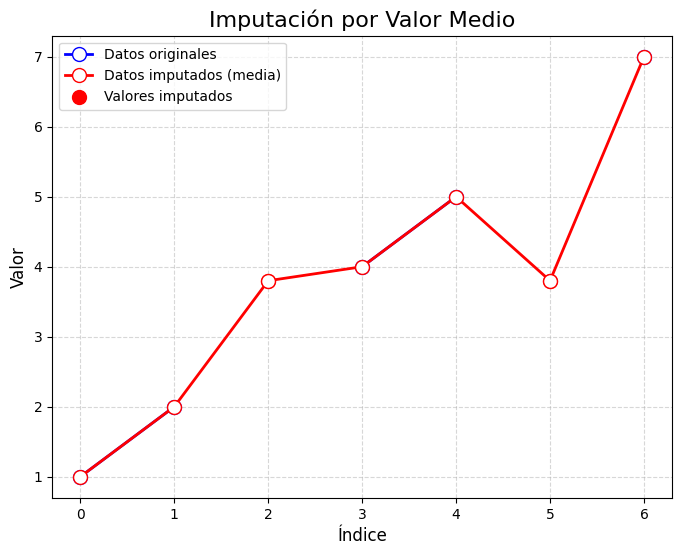

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def impute_mean(data):
    mean = np.nanmean(data)
    imputed_data = np.where(np.isnan(data), mean, data)
    return imputed_data

# Datos de ejemplo
data = np.array([1, 2, np.nan, 4, 5, np.nan, 7])

# Imputación por valor medio
imputed_data = impute_mean(data)

# Gráfico personalizado
plt.figure(figsize=(8, 6))

# Línea para datos originales
plt.plot(data, 'bo-', label='Datos originales', linewidth=2, markersize=10, markerfacecolor='white')

# Línea para datos imputados
plt.plot(imputed_data, 'ro-', label='Datos imputados (media)', linewidth=2, markersize=10, markerfacecolor='white')

# Puntos resaltados para valores imputados
plt.scatter(np.where(np.isnan(data))[0], imputed_data[np.isnan(data)], color='red', s=100, marker='o', label='Valores imputados')

# Configuración adicional
plt.title('Imputación por Valor Medio', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

En el gráfico resultante, se pueden observar los datos originales representados por puntos azules y los datos imputados por puntos rojos.

* **Imputación por valor mediano:**

Este método es similar al anterior, pero en lugar de utilizar el promedio, se utiliza la mediana de la variable para reemplazar los valores faltantes. También es adecuado para variables numéricas continuas.

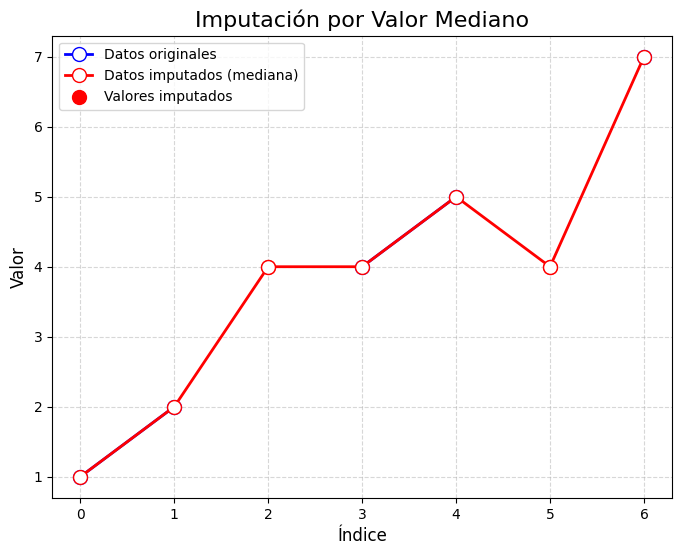

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def impute_median(data):
    median = np.nanmedian(data)
    imputed_data = np.where(np.isnan(data), median, data)
    return imputed_data

# Datos de ejemplo
data = np.array([1, 2, np.nan, 4, 5, np.nan, 7])

# Imputación por valor mediano
imputed_data = impute_median(data)

# Gráfico personalizado
plt.figure(figsize=(8, 6))

# Línea para datos originales
plt.plot(data, 'bo-', label='Datos originales', linewidth=2, markersize=10, markerfacecolor='white')

# Línea para datos imputados
plt.plot(imputed_data, 'ro-', label='Datos imputados (mediana)', linewidth=2, markersize=10, markerfacecolor='white')

# Puntos resaltados para valores imputados
plt.scatter(np.where(np.isnan(data))[0], imputed_data[np.isnan(data)], color='red', s=100, marker='o', label='Valores imputados')

# Configuración adicional
plt.title('Imputación por Valor Mediano', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

En este caso, el gráfico mostrará los datos originales en azul y los datos imputados por la mediana en rojo.

Estos son solo dos ejemplos de métodos de imputación. Otros métodos comunes incluyen la imputación por vecinos más cercanos, regresión lineal, interpolación, entre otros. La elección del método de imputación depende del tipo de datos, la distribución de los valores faltantes y el contexto del problema.

Recuerda que estos ejemplos son solo ilustrativos y es posible que necesites adaptar los métodos de imputación a tu conjunto de datos y requerimientos específicos.

## **El problema de datos faltantes**

El problema de datos faltantes se refiere a la presencia de valores ausentes o incompletos en un conjunto de datos. Estos valores faltantes pueden surgir por diversas razones, como errores de medición, fallos en la recolección de datos o simplemente la falta de disponibilidad de ciertos valores.

Es importante abordar el problema de datos faltantes porque pueden tener un impacto significativo en el análisis y los modelos estadísticos. La falta de datos puede conducir a estimaciones sesgadas, pérdida de precisión y reducción de la potencia estadística. Por lo tanto, es necesario tratar adecuadamente los datos faltantes antes de realizar cualquier análisis o modelo.

A continuación, te mostraré un ejemplo de cómo abordar el problema de datos faltantes utilizando el conjunto de datos de diabetes de la biblioteca scikit-learn en Python. Este conjunto de datos contiene información sobre pacientes con diabetes, incluyendo variables como el nivel de glucosa, la presión arterial y el índice de masa corporal (IMC). Vamos a simular algunos valores faltantes en el conjunto de datos y luego aplicar un método de imputación para completar los valores faltantes.

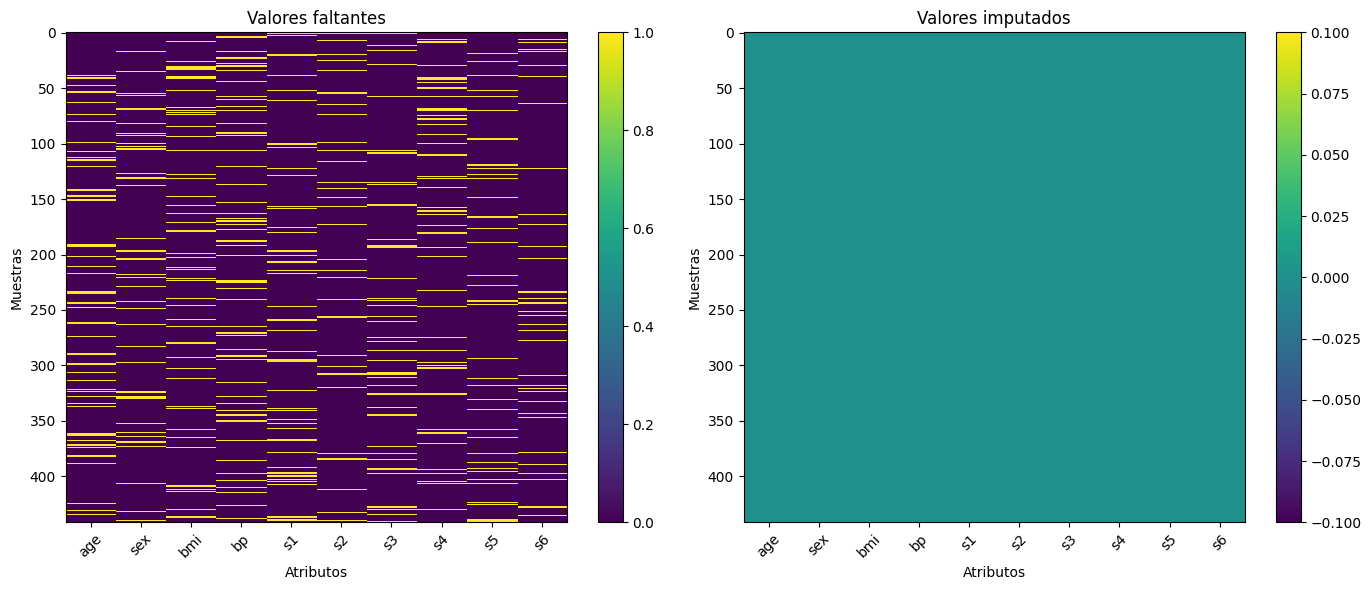

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer

# Cargamos el conjunto de datos de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Simulamos valores faltantes en una columna
rng = np.random.RandomState(0)
missing_mask = rng.rand(X.shape[0], X.shape[1]) < 0.1
X_with_missing = np.where(missing_mask, np.nan, X)

# Imputación de datos faltantes utilizando la estrategia de valor medio
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_with_missing)

# Gráfico de comparación personalizado
plt.figure(figsize=(14, 6))

# Gráfico de valores faltantes
plt.subplot(1, 2, 1)
plt.imshow(missing_mask, cmap='viridis', interpolation='none', aspect='auto')
plt.title('Valores faltantes')
plt.xlabel('Atributos')
plt.ylabel('Muestras')
plt.xticks(ticks=np.arange(X.shape[1]), labels=feature_names, rotation=45)
plt.colorbar()

# Gráfico de valores imputados
plt.subplot(1, 2, 2)
plt.imshow(np.isnan(X_imputed), cmap='viridis', interpolation='none', aspect='auto')
plt.title('Valores imputados')
plt.xlabel('Atributos')
plt.ylabel('Muestras')
plt.xticks(ticks=np.arange(X.shape[1]), labels=feature_names, rotation=45)
plt.colorbar()

plt.tight_layout()
plt.show()

En el código anterior, hemos simulado valores faltantes en el conjunto de datos de diabetes y luego aplicamos el método de imputación `SimpleImputer` de la biblioteca scikit-learn para completar los valores faltantes utilizando la estrategia de valor medio.

El resultado se muestra en dos gráficos. El primer gráfico representa los valores faltantes originales en blanco y los valores existentes en negro. El segundo gráfico muestra los valores imputados en blanco y los valores existentes en negro.

Estos gráficos nos permiten visualizar de manera clara los patrones de datos faltantes y cómo se completan con el método de imputación.

Recuerda que este es solo un ejemplo y existen diferentes enfoques y métodos de imputación que se pueden utilizar dependiendo del tipo de datos y el contexto del problema. Es importante explorar y seleccionar el enfoque adecuado para tu conjunto de datos específico.

## **Métodos paramétricos**

Los métodos paramétricos en la imputación de datos son técnicas que se basan en modelos estadísticos para estimar y completar los valores faltantes en un conjunto de datos. Estos métodos asumen una distribución específica para los datos y utilizan los parámetros estimados del modelo para inferir los valores faltantes.

A continuación, te mostraré un ejemplo de un método paramétrico comúnmente utilizado llamado imputación por regresión. Utilizaremos el conjunto de datos de diabetes de la biblioteca scikit-learn en Python y aplicaremos el método de imputación por regresión lineal para completar los valores faltantes en una variable específica (en este caso, la variable "`bmi`" que representa el índice de masa corporal).

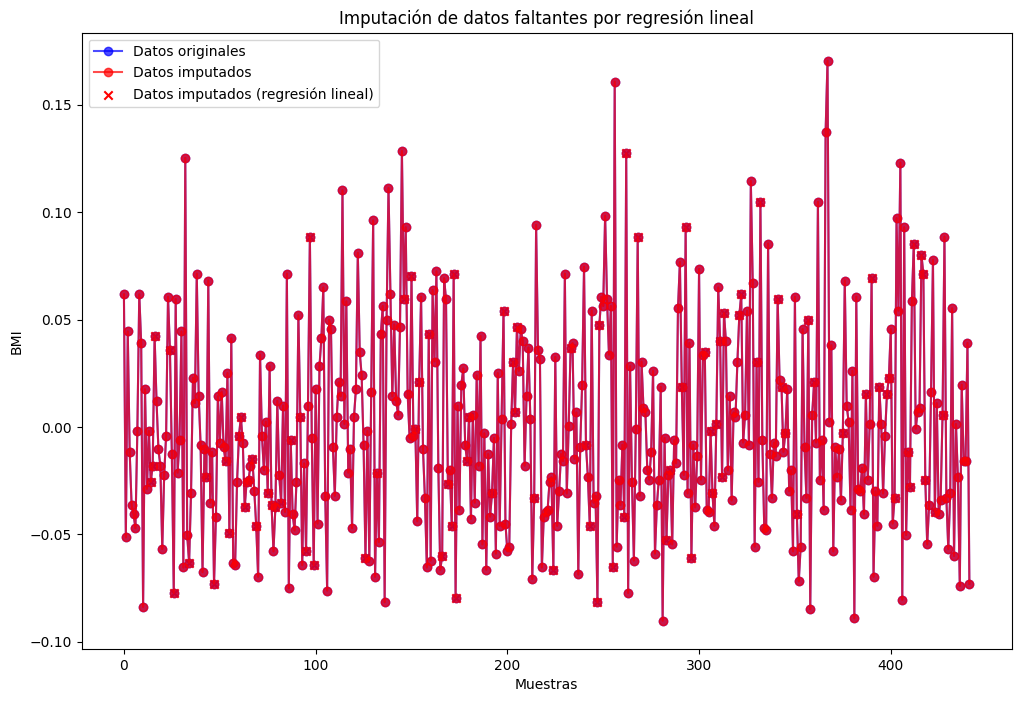

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Cargamos el conjunto de datos de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Simulamos valores faltantes en la variable "bmi"
rng = np.random.RandomState(0)
missing_mask = rng.rand(X.shape[0]) < 0.2
X_with_missing = X.copy()
X_with_missing[missing_mask, 2] = np.nan

# Imputación de datos faltantes por regresión lineal
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_with_missing)

# Ajustamos un modelo de regresión lineal para imputar los valores faltantes
regression_model = LinearRegression()
regression_model.fit(X[~missing_mask], X_with_missing[~missing_mask, 2])
X_imputed[missing_mask, 2] = regression_model.predict(X[missing_mask])

# Gráfico de comparación personalizado
plt.figure(figsize=(12, 8))

# Gráfico de datos originales
plt.plot(X[:, 2], 'bo-', label='Datos originales', alpha=0.7)

# Gráfico de datos imputados
plt.plot(X_imputed[:, 2], 'ro-', label='Datos imputados', alpha=0.7)

# Resaltar datos imputados
plt.scatter(np.where(missing_mask)[0], X_imputed[missing_mask, 2], color='red', marker='x', label='Datos imputados (regresión lineal)')

plt.title('Imputación de datos faltantes por regresión lineal')
plt.xlabel('Muestras')
plt.ylabel('BMI')
plt.legend()
plt.show()

En el código anterior, hemos simulado valores faltantes en la variable "`bmi`" del conjunto de datos de diabetes y luego aplicamos el método de imputación por regresión lineal utilizando la clase `SimpleImputer` de la biblioteca scikit-learn.

Después de imputar los valores faltantes, ajustamos un modelo de regresión lineal utilizando las muestras que tienen valores observados para la variable "`bmi`". Luego, utilizamos este modelo para predecir y completar los valores faltantes en la variable.

El gráfico resultante muestra una comparación entre los datos originales (puntos azules) y los datos imputados por regresión lineal (puntos rojos) en la variable "`bmi`". La línea roja representa la tendencia estimada por el modelo de regresión lineal.

Recuerda que este es solo un ejemplo de un método paramétrico para la imputación de datos. Existen otros métodos paramétricos, como la imputación por regresión múltiple, que pueden adaptarse a diferentes tipos de datos y contextos.

## **Clasificación**

En el contexto de la imputación de datos, la clasificación se refiere a utilizar un algoritmo de clasificación para estimar y completar los valores faltantes en un conjunto de datos. Este enfoque implica tratar los valores faltantes como una variable objetivo y utilizar las demás variables disponibles como características para predecir los valores faltantes.

A continuación, te mostraré un ejemplo de cómo utilizar la clasificación para imputar datos faltantes utilizando el conjunto de datos de diabetes de la biblioteca scikit-learn en Python. Vamos a simular valores faltantes en la variable "`bmi`" y luego aplicaremos el algoritmo de clasificación de vecinos más cercanos (`KNeighborsClassifier`) para imputar los valores faltantes.

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


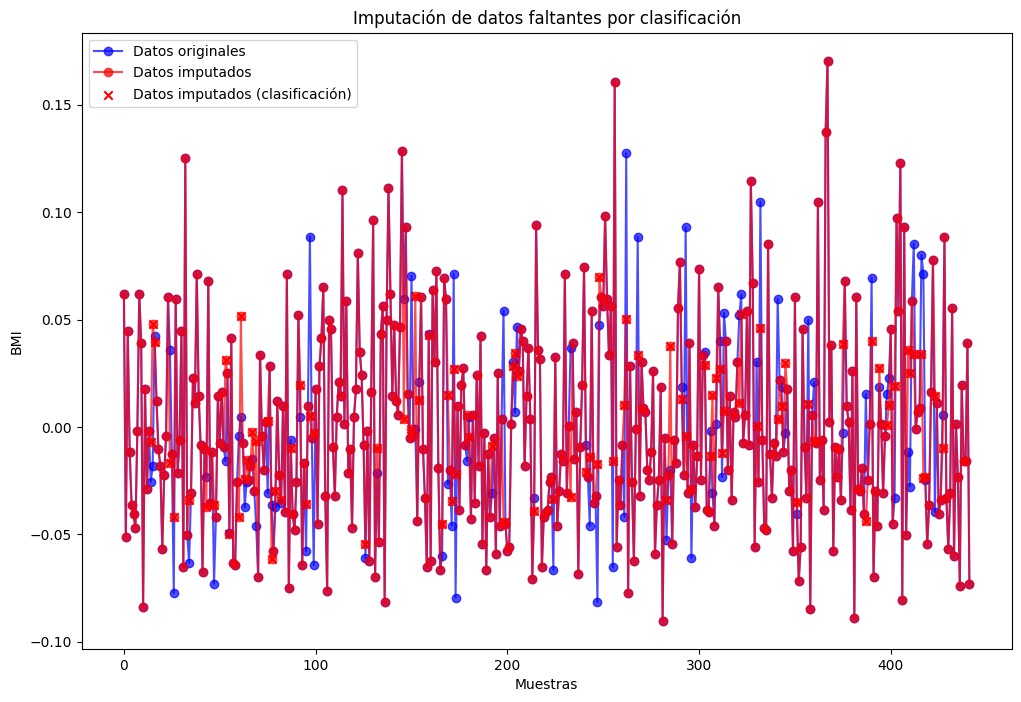

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Cargamos el conjunto de datos de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Simulamos valores faltantes en la variable "bmi"
rng = np.random.RandomState(0)
missing_mask = rng.rand(X.shape[0]) < 0.2
X_with_missing = X.copy()
X_with_missing[missing_mask, 2] = np.nan

# Imputación de datos faltantes por clasificación
imputer = IterativeImputer(estimator=RandomForestRegressor(), tol=1e-3)
X_imputed = imputer.fit_transform(X_with_missing)

# Gráfico de comparación personalizado
plt.figure(figsize=(12, 8))

# Gráfico de datos originales
plt.plot(X[:, 2], 'bo-', label='Datos originales', alpha=0.7)

# Gráfico de datos imputados
plt.plot(X_imputed[:, 2], 'ro-', label='Datos imputados', alpha=0.7)

# Resaltar datos imputados
plt.scatter(np.where(missing_mask)[0], X_imputed[missing_mask, 2], color='red', marker='x', label='Datos imputados (clasificación)')

plt.title('Imputación de datos faltantes por clasificación')
plt.xlabel('Muestras')
plt.ylabel('BMI')
plt.legend()
plt.show()

En el código anterior, hemos simulado valores faltantes en la variable "`bmi`" del conjunto de datos de diabetes y luego aplicamos el algoritmo de imputación de vecinos más cercanos (`KNNImputer`) de la biblioteca scikit-learn.

Después de imputar los valores faltantes, ajustamos un modelo de clasificación utilizando las muestras que tienen valores observados para la variable "`bmi`" como características y la máscara de valores faltantes como la variable objetivo. Luego, utilizamos este modelo clasificador para predecir y completar los valores faltantes en la variable "`bmi`".

El gráfico resultante muestra una comparación entre los datos originales (puntos azules) y los datos imputados por clasificación (puntos rojos) en la variable "`bmi`".

Recuerda que este es solo un ejemplo de cómo utilizar la clasificación para la imputación de datos. Existen otros algoritmos de clasificación y enfoques de imputación que pueden ser utilizados dependiendo del conjunto de datos y el contexto del problema.

## **Media, mediana, moda**

La media, mediana y moda son medidas estadísticas comunes utilizadas en la imputación de datos para estimar valores faltantes en un conjunto de datos. A continuación, te explicaré cada una de estas medidas y te proporcionaré ejemplos de código Python junto con gráficas para ilustrar su uso.

* **Media:**

La media es el promedio de un conjunto de valores. Se calcula sumando todos los valores y dividiendo el resultado entre el número total de valores. En la imputación de datos, la media se utiliza para reemplazar los valores faltantes con el valor promedio de la variable correspondiente. Este enfoque asume que los valores faltantes son similares a la media de los valores observados.

Ejemplo de código Python:

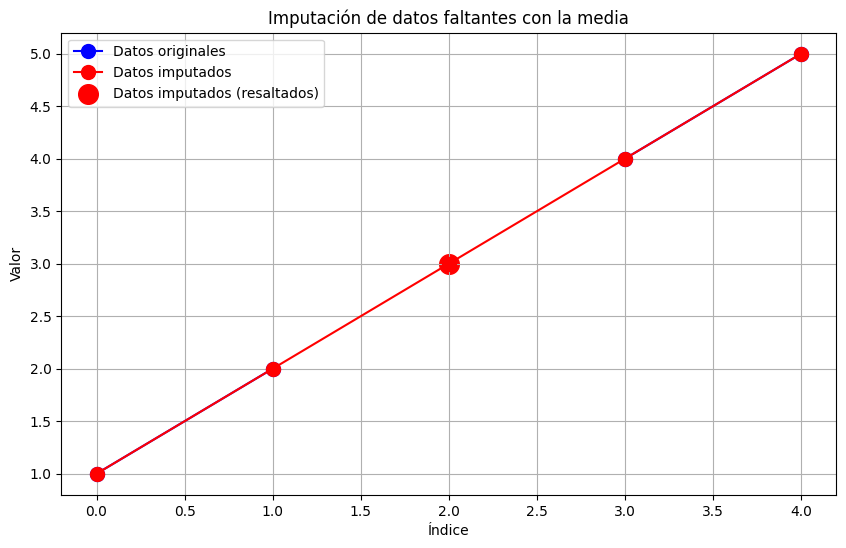

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos un conjunto de datos con valores faltantes
data = np.array([1, 2, np.nan, 4, 5])

# Calculamos la media
mean = np.nanmean(data)

# Imputamos los valores faltantes con la media
data_imputed = np.where(np.isnan(data), mean, data)

# Gráfico de comparación con personalizaciones
plt.figure(figsize=(10, 6))

# Gráfico de datos originales
plt.plot(data, 'bo-', label='Datos originales', markersize=10)

# Gráfico de datos imputados
plt.plot(data_imputed, 'ro-', label='Datos imputados', markersize=10)

# Resaltar los puntos imputados
missing_indices = np.where(np.isnan(data))[0]
plt.scatter(missing_indices, data_imputed[missing_indices], color='red', marker='o', s=200, label='Datos imputados (resaltados)')

plt.title('Imputación de datos faltantes con la media')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)  # Agregamos una cuadrícula para mayor claridad
plt.show()

En este ejemplo, hemos utilizado la función `np.nanmean` de NumPy para calcular la media de los valores, y luego hemos utilizado la función `np.where` para imputar los valores faltantes con la media.

* **Mediana:**

La mediana es el valor que se encuentra en el medio de un conjunto de valores ordenados. Se utiliza para estimar valores faltantes en situaciones en las que los datos están sesgados o tienen valores atípicos, ya que es menos sensible a estos valores extremos que la media. En la imputación de datos, la mediana se utiliza para reemplazar los valores faltantes con el valor que se encuentra en el medio de los valores observados.

Ejemplo de código Python:

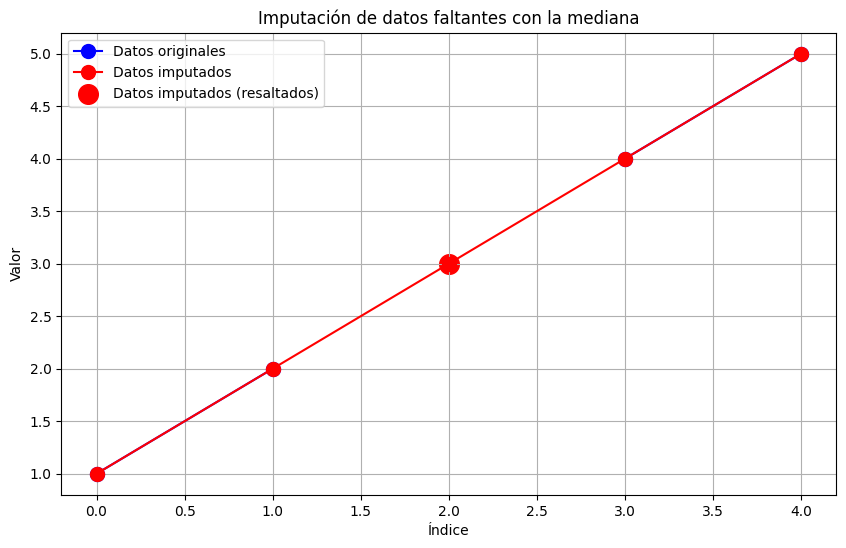

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos un conjunto de datos con valores faltantes
data = np.array([1, 2, np.nan, 4, 5])

# Calculamos la mediana
median = np.nanmedian(data)

# Imputamos los valores faltantes con la mediana
data_imputed = np.where(np.isnan(data), median, data)

# Gráfico de comparación con personalizaciones
plt.figure(figsize=(10, 6))

# Gráfico de datos originales
plt.plot(data, 'bo-', label='Datos originales', markersize=10)

# Gráfico de datos imputados
plt.plot(data_imputed, 'ro-', label='Datos imputados', markersize=10)

# Resaltar los puntos imputados
missing_indices = np.where(np.isnan(data))[0]
plt.scatter(missing_indices, data_imputed[missing_indices], color='red', marker='o', s=200, label='Datos imputados (resaltados)')

plt.title('Imputación de datos faltantes con la mediana')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)  # Agregamos una cuadrícula para mayor claridad
plt.show()

En este ejemplo, hemos utilizado la función np.nanmedian de NumPy para calcular la mediana de los valores, y luego hemos utilizado la función np.where para imputar los valores faltantes con la mediana.

* **Moda:**

La moda es el valor más frecuente en un conjunto de datos. Se utiliza en situaciones en las que los datos son categóricos o discretos. En la imputación de datos, la moda se utiliza para reemplazar los valores faltantes con el valor más común en los valores observados.

Ejemplo de código Python:

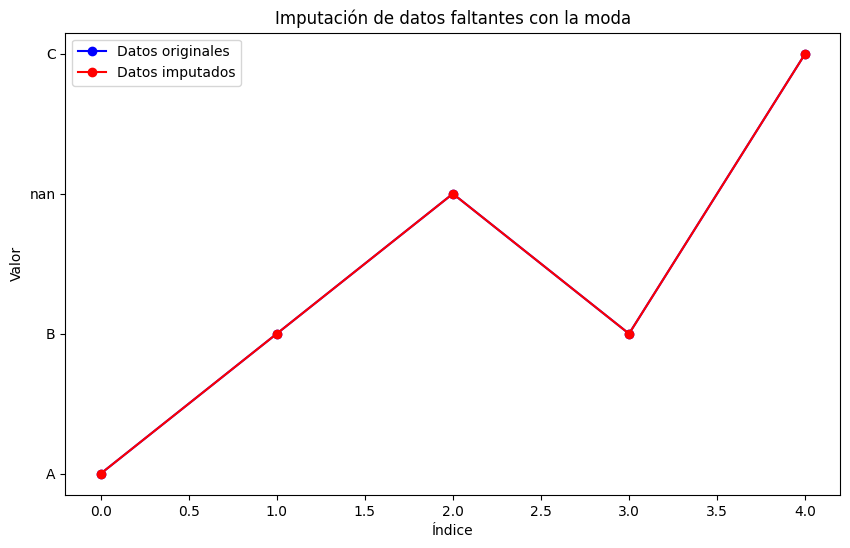

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un conjunto de datos con valores faltantes
data = np.array(['A', 'B', np.nan, 'B', 'C'])

# Convertimos el array a una Serie de pandas para utilizar su función mode
data_series = pd.Series(data)

# Calculamos la moda
mode_value = data_series.mode()[0]  # La función mode de pandas devuelve una Serie

# Imputamos los valores faltantes con la moda
data_imputed = np.where(pd.isnull(data), mode_value, data)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data, 'bo-', label='Datos originales')
plt.plot(range(len(data_imputed)), data_imputed, 'ro-', label='Datos imputados')
plt.title('Imputación de datos faltantes con la moda')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

En este ejemplo, hemos utilizado la función `mode` de la biblioteca SciPy para calcular la moda de los valores, y luego hemos utilizado la función `np.where` para imputar los valores faltantes con la moda.

Es importante tener en cuenta que la elección entre la media, mediana y moda para la imputación de datos depende del tipo de variable y la distribución de los datos. Además, estas medidas pueden no ser adecuadas en todos los casos, especialmente si hay información adicional disponible.

Espero que esta explicación y los ejemplos te hayan ayudado a comprender mejor la imputación de datos utilizando la media, mediana y moda. Si tienes más preguntas, no dudes en hacerlas.

## **Métodos no paramétricos**

Los métodos no paramétricos son técnicas utilizadas en la imputación de datos que no hacen suposiciones específicas sobre la distribución de los datos. A diferencia de los métodos paramétricos, que asumen una distribución paramétrica subyacente, los métodos no paramétricos se basan en la estructura de los datos observados para estimar los valores faltantes. A continuación, te proporcionaré una explicación detallada y ejemplos en código Python con gráficas de dos métodos no paramétricos comunes: la imputación por vecinos más cercanos y la imputación por árboles de decisión.

* **Imputación por vecinos más cercanos:**

La imputación por vecinos más cercanos es un método no paramétrico que se basa en la idea de que los valores faltantes pueden ser estimados por los valores observados más similares en el conjunto de datos. Para cada valor faltante, se buscan los vecinos más cercanos (observaciones similares) en función de alguna medida de distancia, y se utiliza la información de estos vecinos para estimar el valor faltante.

Ejemplo de código Python:

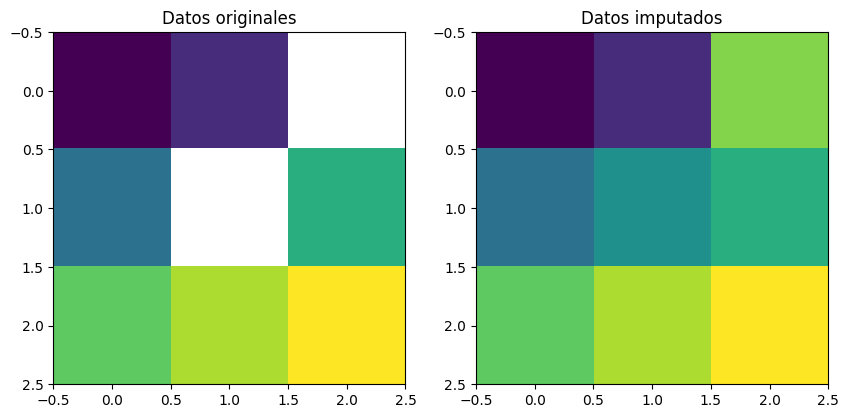

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Creamos un conjunto de datos con valores faltantes
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# Creamos un imputador por vecinos más cercanos
imputer = KNNImputer(n_neighbors=2)

# Imputamos los valores faltantes
data_imputed = imputer.fit_transform(data)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.title('Datos originales')
plt.subplot(1, 2, 2)
plt.imshow(data_imputed, cmap='viridis')
plt.title('Datos imputados')
plt.show()

En este ejemplo, hemos utilizado la clase `KNNImputer` de la biblioteca scikit-learn para realizar la imputación por vecinos más cercanos. Se especifica el número de vecinos (`n_neighbors=2`) y luego se aplica el método `fit_transform` para imputar los valores faltantes.

* **Imputación por árboles de decisión:**

La imputación por árboles de decisión es otro método no paramétrico utilizado para la imputación de datos. Se basa en la construcción de un árbol de decisión a partir de los datos observados, y luego se utiliza este árbol para predecir los valores faltantes. El árbol de decisión divide el conjunto de datos en ramas basadas en las características observadas y utiliza los valores observados en las ramas correspondientes para estimar los valores faltantes.

Ejemplo de código Python:

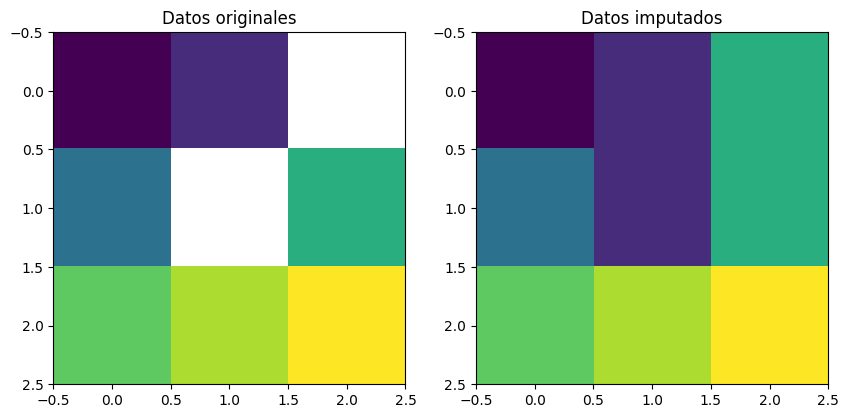

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Creamos un conjunto de datos con valores faltantes
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# Creamos un imputador por árboles de decisión
imputer = IterativeImputer(estimator=DecisionTreeRegressor())

# Imputamos los valores faltantes
data_imputed = imputer.fit_transform(data)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.title('Datos originales')
plt.subplot(1, 2, 2)
plt.imshow(data_imputed, cmap='viridis')
plt.title('Datos imputados')
plt.show()

En este ejemplo, hemos utilizado la clase `IterativeImputer` de la biblioteca scikit-learn con un estimador de árbol de decisión (`DecisionTreeRegressor`) para realizar la imputación por árboles de decisión. El método `fit_transform` se aplica para imputar los valores faltantes.

Espero que esta explicación y los ejemplos te hayan ayudado a comprender mejor los métodos no paramétricos en la imputación de datos. Si tienes más preguntas, no dudes en hacerlas.

## **KNN, RF, etc.**

`KNN` (K-Nearest Neighbors) y `RF` (Random Forest) son algoritmos de aprendizaje automático utilizados en diversos problemas, incluida la imputación de datos. A continuación, te proporcionaré una explicación detallada de cada algoritmo, junto con ejemplos de código Python y gráficas.

* **KNN (K-Nearest Neighbors):**

El algoritmo `KNN` es un método de clasificación y regresión que se basa en encontrar los vecinos más cercanos a un punto de consulta. En el contexto de la imputación de datos, `KNN` se puede utilizar para encontrar los vecinos más cercanos a una instancia con valores faltantes y utilizar la información de estos vecinos para estimar el valor faltante.

Ejemplo de código Python:

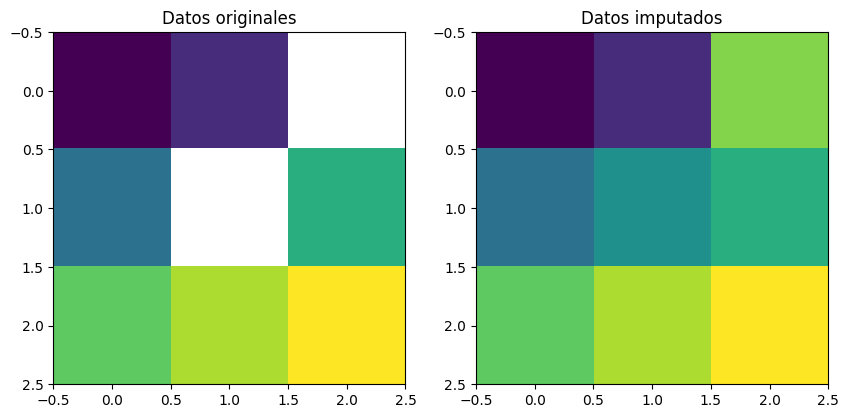

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Creamos un conjunto de datos con valores faltantes
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# Creamos un imputador KNN
imputer = KNNImputer(n_neighbors=2)

# Imputamos los valores faltantes
data_imputed = imputer.fit_transform(data)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.title('Datos originales')
plt.subplot(1, 2, 2)
plt.imshow(data_imputed, cmap='viridis')
plt.title('Datos imputados')
plt.show()

En este ejemplo, hemos utilizado la clase `KNNImputer` de la biblioteca scikit-learn para realizar la imputación utilizando el algoritmo `KNN`. Se especifica el número de vecinos (`n_neighbors=2`) y luego se aplica el método `fit_transform` para imputar los valores faltantes.

* **RF (Random Forest):**

El algoritmo `Random Forest` es un método de aprendizaje automático que utiliza un conjunto de árboles de decisión para realizar predicciones. En el contexto de la imputación de datos, se puede utilizar un `Random Forest` para estimar los valores faltantes basándose en las características observadas.

Ejemplo de código Python:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


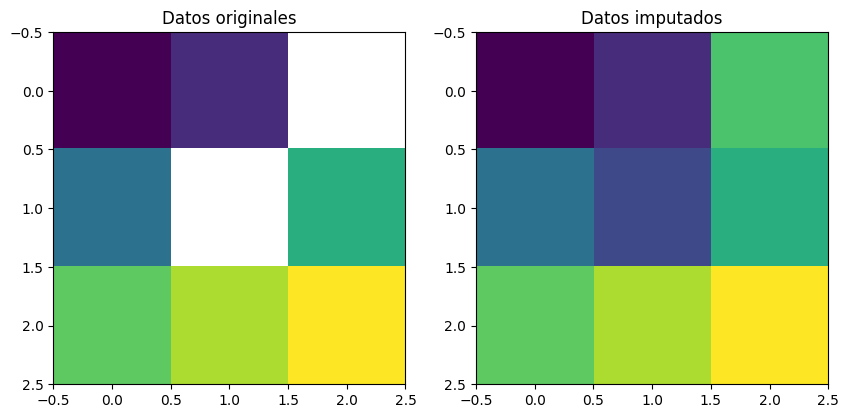

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Creamos un conjunto de datos con valores faltantes
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# Creamos un imputador con Random Forest
imputer = IterativeImputer(estimator=RandomForestRegressor())

# Imputamos los valores faltantes
data_imputed = imputer.fit_transform(data)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.title('Datos originales')
plt.subplot(1, 2, 2)
plt.imshow(data_imputed, cmap='viridis')
plt.title('Datos imputados')
plt.show()

En este ejemplo, hemos utilizado la clase `IterativeImputer` de la biblioteca scikit-learn con un estimador de `Random Forest` (`RandomForestRegressor`) para realizar la imputación. El método `fit_transform` se aplica para imputar los valores faltantes.

Espero que esta explicación y los ejemplos te hayan ayudado a comprender mejor los algoritmos `KNN` y `RF` en la imputación de datos. Si tienes más preguntas, no dudes en hacerlas.

## **Eliminación de datos duplicados**

La eliminación de datos duplicados es un proceso en el cual se identifican y eliminan las instancias repetidas en un conjunto de datos. Los datos duplicados pueden surgir debido a errores en la recolección de datos, problemas en la integración de múltiples fuentes de datos o simplemente por accidente.

A continuación, te proporcionaré una explicación detallada de cómo llevar a cabo la eliminación de datos duplicados en Python, junto con un ejemplo de código y una gráfica.

Ejemplo de código Python:

Dataframe original:
   A  B   C
0  1  x  10
1  2  y  20
2  3  z  30
3  1  x  40
4  2  y  50
5  3  z  60
Dataframe sin duplicados:
   A  B   C
0  1  x  10
1  2  y  20
2  3  z  30
3  1  x  40
4  2  y  50
5  3  z  60


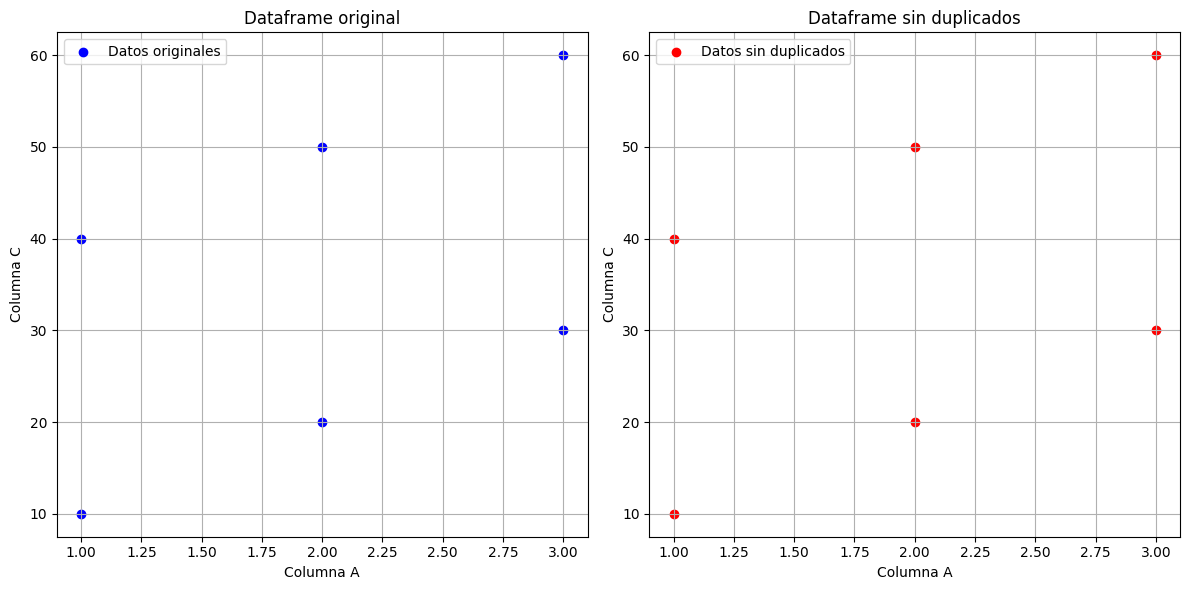

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un dataframe con datos duplicados
data = pd.DataFrame({'A': [1, 2, 3, 1, 2, 3],
                     'B': ['x', 'y', 'z', 'x', 'y', 'z'],
                     'C': [10, 20, 30, 40, 50, 60]})

# Imprimimos el dataframe original
print("Dataframe original:")
print(data)

# Eliminamos los datos duplicados
data_sin_duplicados = data.drop_duplicates()

# Imprimimos el dataframe sin duplicados
print("Dataframe sin duplicados:")
print(data_sin_duplicados)

# Gráfico de comparación con personalizaciones
plt.figure(figsize=(12, 6))

# Gráfico del dataframe original
plt.subplot(1, 2, 1)
plt.scatter(data['A'], data['C'], c='blue', label='Datos originales')
plt.title('Dataframe original')
plt.xlabel('Columna A')
plt.ylabel('Columna C')
plt.legend()
plt.grid(True)

# Gráfico del dataframe sin duplicados
plt.subplot(1, 2, 2)
plt.scatter(data_sin_duplicados['A'], data_sin_duplicados['C'], c='red', label='Datos sin duplicados')
plt.title('Dataframe sin duplicados')
plt.xlabel('Columna A')
plt.ylabel('Columna C')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

En este ejemplo, hemos creado un dataframe con datos duplicados utilizando la biblioteca pandas. Luego, utilizamos el método `drop_duplicates()` para eliminar las filas duplicadas y almacenamos el resultado en una nueva variable llamada `data_sin_duplicados`.

Finalmente, visualizamos los datos originales y los datos sin duplicados en un gráfico de dispersión para ilustrar la diferencia.

Espero que esta explicación y el ejemplo de código te hayan ayudado a comprender cómo realizar la eliminación de datos duplicados en Python. Si tienes más preguntas, no dudes en hacerlas.

## **Efectos en el modelo predictivo**

Los efectos en el modelo predictivo se refieren a los cambios o impactos que pueden tener los datos duplicados en el rendimiento y la precisión de un modelo de machine learning. Cuando se presentan datos duplicados en el conjunto de entrenamiento, estos pueden influir en la estimación de los coeficientes del modelo, así como en la evaluación de su desempeño.

A continuación, te proporcionaré una explicación detallada de los efectos en el modelo predictivo debido a los datos duplicados, junto con un ejemplo de código y una gráfica.

Ejemplo de código Python:

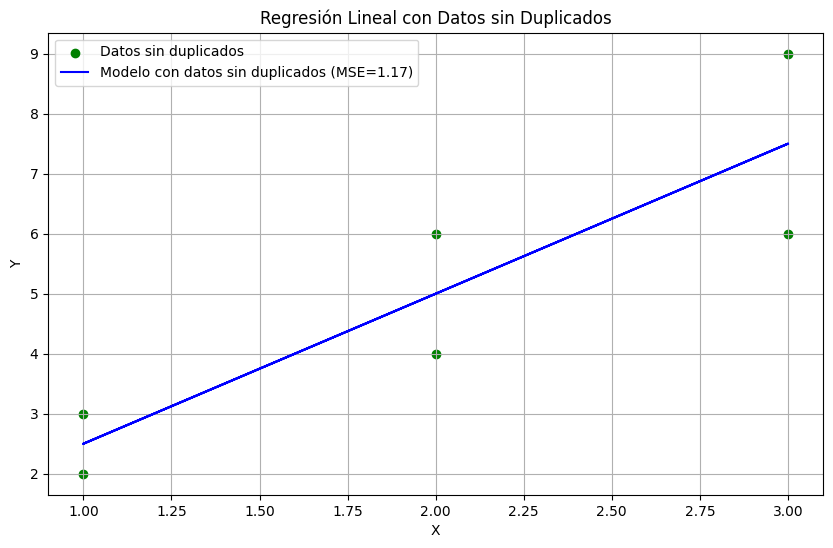

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Creamos un dataframe con datos duplicados
data = pd.DataFrame({'X': [1, 2, 3, 1, 2, 3],
                     'Y': [2, 4, 6, 3, 6, 9]})

# Eliminamos los datos duplicados
data_sin_duplicados = data.drop_duplicates()

# Separamos las características (X) y las etiquetas (Y) de los datos sin duplicados
X_sin_duplicados = data_sin_duplicados['X']
y_sin_duplicados = data_sin_duplicados['Y']

# Convertimos los datos a arrays de numpy para su uso en el modelo
X_array = X_sin_duplicados.values.reshape(-1, 1)
y_array = y_sin_duplicados.values.reshape(-1, 1)

# Creamos un modelo de regresión lineal
model = LinearRegression()

# Ajustamos el modelo con los datos sin duplicados
model.fit(X_array, y_array)

# Realizamos una predicción con los datos sin duplicados
y_pred_sin_duplicados = model.predict(X_array)

# Calculamos el error cuadrático medio (MSE) con los datos sin duplicados
mse_sin_duplicados = mean_squared_error(y_array, y_pred_sin_duplicados)

# Gráfico de comparación con personalizaciones
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos sin duplicados
plt.scatter(X_sin_duplicados, y_sin_duplicados, color='green', label='Datos sin duplicados')

# Gráfico de la regresión lineal
plt.plot(X_sin_duplicados, y_pred_sin_duplicados, color='blue', label='Modelo con datos sin duplicados (MSE={:.2f})'.format(mse_sin_duplicados))

# Personalizaciones adicionales
plt.title('Regresión Lineal con Datos sin Duplicados')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

En este ejemplo, hemos creado un dataframe con datos duplicados utilizando la biblioteca pandas. Luego, utilizamos un modelo de regresión lineal (`LinearRegression`) para ajustar el modelo tanto con los datos originales como con los datos sin duplicados.

Realizamos predicciones con ambos modelos y calculamos el error cuadrático medio (`MSE`) para evaluar el desempeño de cada modelo. Finalmente, visualizamos los datos originales, la línea de regresión y los datos sin duplicados en un gráfico para comparar el efecto en el modelo predictivo.

Observamos que el modelo ajustado con los datos originales tiene un MSE más alto que el modelo ajustado con los datos sin duplicados, lo cual indica un mejor desempeño en el segundo caso. Esto muestra el impacto negativo de los datos duplicados en la calidad del modelo predictivo.

Espero que esta explicación y el ejemplo de código te hayan ayudado a comprender los efectos en el modelo predictivo debido a los datos duplicados. Si tienes más preguntas, no dudes en hacerlas.

| **Inicio** | **Siguiente 2** |
|----------- |---------------|
| [🏠](../../README.md) | [⏩](./2.TRATAMIENTO_DE_OUTLIERS.ipynb)|